In [37]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import Ridge
from scipy import stats

import keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [31]:
data = pd.read_csv("file:///C:/Users/DELL/Downloads/Train_Data.csv")
test_data = pd.read_csv("file:///C:/Users/DELL/Downloads/Test_Data.csv")
data.revenue.describe()
ceta = data[data.clicks != 0]
CPI = ceta.clicks/ceta.impressions

In [5]:
data.drop(["campaign","date","adgroup","ad"],axis=1,inplace=True)
test_data.drop(["campaign","date","adgroup","ad"],axis=1,inplace=True)

In [6]:
data.head()

,impressions,clicks,cost,conversions,revenue
0,24,6,0.08,0,0.00
1,1,0,0.00,0,0.00
2,13,4,0.04,0,0.00
3,5,4,0.08,0,0.00
4,247,126,1.29,4,925.71


In [7]:
beta = data[data.revenue !=0 ]
beta

,impressions,clicks,cost,conversions,revenue
4,247,126,1.29,4,925.71
13,253,128,1.32,2,339.83
17,250,114,1.17,3,384.22
18,261,123,1.27,4,337.57
20,329,130,1.40,3,397.59
...,...,...,...,...,...
4555,333,156,2.82,5,394.14
4560,107,51,0.58,2,837.70
4562,78,37,0.50,2,243.08
4564,261,106,1.37,3,404.17


In [34]:
nrcpi , lambdacpi = stats.boxcox(CPI)
print(lambdacpi)

0.2489862072766505


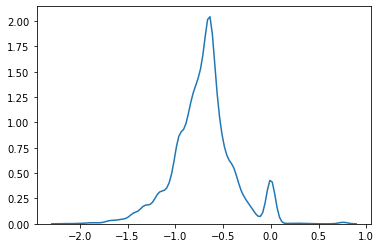

In [35]:
sns.distplot(nrcpi , kde=True ,hist=False)

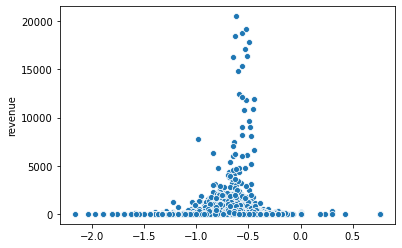

In [36]:
sns.scatterplot(x = nrcpi , y = ceta.revenue)

In [8]:
beta.impressions , lambda1 = stats.boxcox(beta.impressions)
beta.clicks , lambda2 = stats.boxcox(beta.clicks)
beta.cost , lambda3 = stats.boxcox(beta.cost)
beta.conversions , lambda4 = stats.boxcox(beta.conversions)
beta.revenue , lambda5 = stats.boxcox(beta.revenue)
beta 

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,impressions,clicks,cost,conversions,revenue
4,10.432220,7.941292,0.255190,1.002551,4.995702
13,10.509364,7.980931,0.278283,0.586581,4.452883
17,10.470974,7.692140,0.157212,0.847053,4.522253
18,10.610009,7.880868,0.239499,1.002551,4.449089
20,11.379720,8.020072,0.337429,0.847053,4.541434
...,...,...,...,...,...
4555,11.420938,8.489130,1.045854,1.108781,4.536553
4560,7.974019,5.853264,-0.542232,0.586581,4.943924
4562,7.152613,5.194765,-0.689111,0.586581,4.259310
4564,10.610009,7.513970,0.315648,0.847053,4.550616


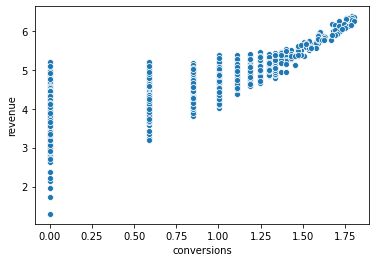

In [15]:
sns.scatterplot(x=beta.conversions ,y = beta.revenue)

In [87]:
ttest_data = test_data[test_data.conversions !=0]

In [88]:
ttest_data.impressions = stats.boxcox(ttest_data.impressions,lambda1)
ttest_data.clicks = stats.boxcox(ttest_data.clicks,lambda2)
ttest_data.conversions = stats.boxcox(ttest_data.conversions,lambda3)
ttest_data.cost = stats.boxcox(ttest_data.cost,lambda4)
ttest_data

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,cost,impressions,clicks,conversions
0,-0.625390,8.308652,5.768960,0.000000
6,0.452815,10.792340,7.880868,0.000000
8,0.057435,9.138494,6.669287,0.000000
10,0.438694,11.001096,7.604367,1.108854
13,-0.131972,8.952903,6.904696,0.697215
...,...,...,...,...
306,-0.222123,8.875963,6.730002,1.819109
309,-2.162884,5.476478,3.949307,0.697215
310,-0.443008,8.817175,6.014145,0.000000
311,-4.300104,5.239245,2.728726,0.000000


In [89]:
indexes = list(ttest_data.index)

In [90]:
y = beta["revenue"]
X = beta.drop("revenue",axis=1)

In [91]:
ridreg = Ridge(alpha=2.77,random_state=781)

In [110]:
ridreg.fit(X,y)

Ridge(alpha=2.77, random_state=781)

In [111]:
ans = ridreg.predict(ttest_data)

In [112]:
print(lambda5)

-0.09692485772937132


In [131]:
eans = (ans*lambda5 + 1)**(1/lambda5)


In [132]:
final_ans = [0]*318
i=0
while(i<len(eans)):
    final_ans[indexes[i]] = eans[i]
    i=i+1

In [133]:
final_ans

[361.64804321724256,
 0,
 0,
 0,
 0,
 0,
 478.6293709913733,
 0,
 388.47404212545376,
 0,
 4516.101045074022,
 0,
 0,
 1450.8443097618274,
 0,
 352.11693532293896,
 0,
 417.0361486194446,
 0,
 253.68306558972347,
 0,
 0,
 0,
 4505.565653275044,
 0,
 0,
 9102.856694400394,
 417.2460514526908,
 0,
 0,
 2107.002897175547,
 0,
 18289.506997502645,
 1272.012483774929,
 268.9037422215227,
 0,
 406.3244681883509,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1333.989283793316,
 417.7683779153266,
 302.4912193899986,
 0,
 0,
 0,
 27092.001938337617,
 0,
 1372.7580430832202,
 0,
 1921.6945984592846,
 0,
 0,
 4295.543871344429,
 531.3217362224568,
 0,
 0,
 1815.9413513828779,
 0,
 0,
 0,
 404.38005412588177,
 306.25439329457197,
 8595.222385040262,
 0,
 0,
 0,
 4187.042702954111,
 546.2713102093962,
 0,
 296.28057756693045,
 0,
 0,
 10305.499819018067,
 77365.8507056376,
 0,
 1385.6618001305399,
 1129.4456818325928,
 870.3915048676485,
 0,
 4554.702794657355,
 308.317667542828

In [57]:
res = pd.DataFrame(final_ans)
res.index = test_data.index
res.columns = ["revenue"]
res.to_csv("final_ridge_sub.csv", index = False) 